In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [5]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [6]:
# generate clusters
x, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

In [58]:
x

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192],
       [ 3.1368855 ,  1.56592763],
       [-0.37494566,  2.38787435],
       [-1.84562253,  2.71924635],
       [ 0.72144399,  4.08475018],
       [ 0.16117091,  4.53517846],
       [-1.99912714,  2.71285741],
       [-1.47804153,  3.2093591 ],
       [ 1.8706766 ,  0.77797407],
       [-1.5933443 ,  2.76898682],
       [ 2.03562611,  0.31361691],
       [ 0.64003985,  4.12401075],
       [ 2.4411628 ,  1.30941574],
       [ 1.13280393,  3.87673946],
       [ 1.04829186,  5.03092408],
       [-1.26637157,  2.62998828],
       [ 2.31690585,  0.81189049],
       [ 2.36230721,  1.358767  ],
       [ 1.2091013 ,  3.53566548],
       [-2.54224625,

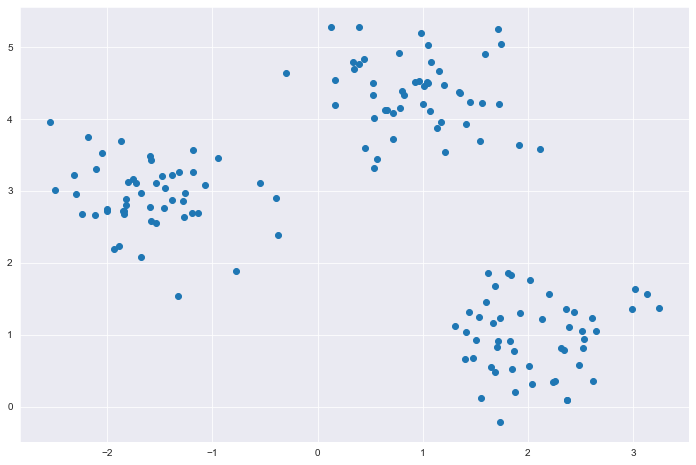

In [18]:
plt.scatter(x=x[:, 0], y=x[:, 1], marker='o');

## K-means Clustering

In [19]:
km = KMeans(n_clusters=3,  #  number of clusters
            n_init=10,  # how many initial runs
            random_state=0)

In [20]:
y_km = km.fit_predict(x)

### Method .fit_predict() is combination of two methods which can be run separately as well:

- .fit() - creates the model using the dataset in the argument of the function
- .predict() - predicts the cluster for every row of the dataset in the argument of the function.

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192],
       [ 3.1368855 ,  1.56592763],
       [-0.37494566,  2.38787435],
       [-1.84562253,  2.71924635],
       [ 0.72144399,  4.08475018],
       [ 0.16117091,  4.53517846],
       [-1.99912714,  2.71285741],
       [-1.47804153,  3.2093591 ],
       [ 1.8706766 ,  0.77797407],
       [-1.5933443 ,  2.76898682],
       [ 2.03562611,  0.31361691],
       [ 0.64003985,  4.12401075],
       [ 2.4411628 ,  1.30941574],
       [ 1.13280393,  3.87673946],
       [ 1.04829186,  5.03092408],
       [-1.26637157,  2.62998828],
       [ 2.31690585,  0.81189049],
       [ 2.36230721,  1.358767  ],
       [ 1.2091013 ,  3.53566548],
       [-2.54224625,

In [47]:
def plot_clusters(x_param, y_res, plt_cluster_centers=False):
    x_centroids = []
    y_centroids = []
    for cluster in set(y_res):
        x = x_param[y_res == cluster, 0]
        y = x_param[y_res == cluster, 1]
        x_centroids.append(np.mean(x))
        y_centroids.append(np.mean(y))
        plt.scatter(x, y, s=50, marker='s', label=f'cluster{cluster}')
    if plt_cluster_centers:
        plt.scatter(x_centroids, y_centroids, marker='*', c='red', s=250, label='centroids')

    plt.legend()
    plt.grid()
    plt.show()

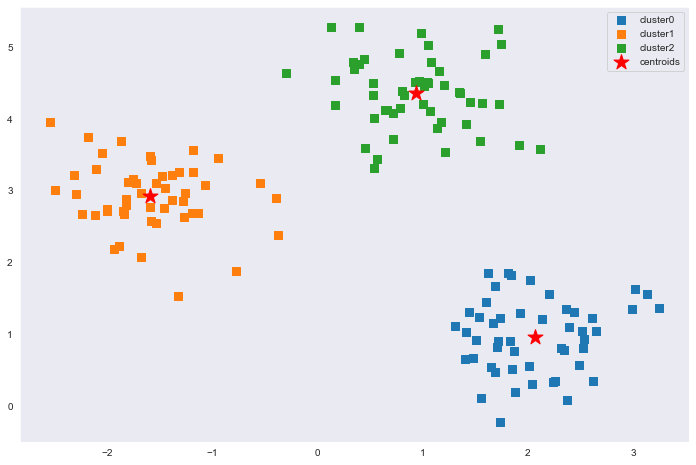

In [48]:
 # plot clustering result
plot_clusters(x, y_km, plt_cluster_centers= True)

In [56]:
def plot_distortion(x,max_clusters=10):
    distortions = []
    for i in range(1, max_clusters+1):
        km = KMeans(n_clusters=i,
                    init='k-means++',  # does not seem to be doing much
                    n_init=10,
                    random_state=0)
        km.fit(x)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

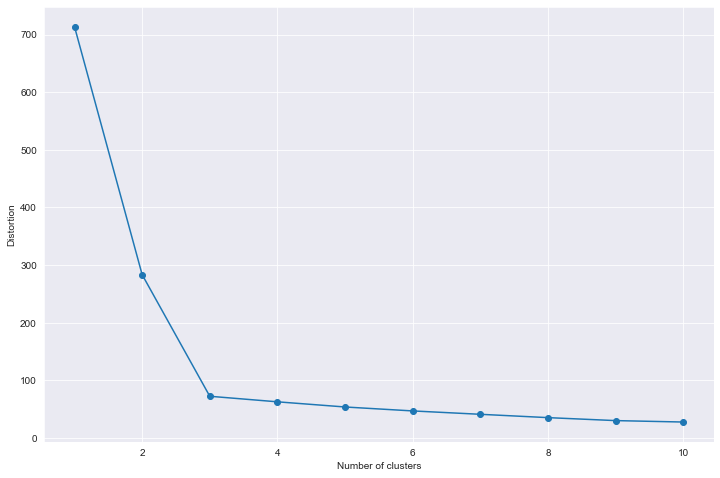

In [57]:
plot_distortion(x, 10)